## Hamburg analysis

### Dataset HK_Cities

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

hk_cities = pd.read_csv('./Data/HK_cities.csv', dtype={'plz': object})

df = pd.DataFrame(hk_cities)

/var/folders/5h/0pnj053913z2cl2pgkgr888h0000gp/T/ipykernel_14283/863109955.py:4: DtypeWarning: Columns (10,19) have mixed types. Specify dtype option on import or set low_memory=False.
  hk_cities = pd.read_csv('./Data/HK_cities.csv', dtype={'plz': object})


In [4]:
plz_city = pd.read_csv('./Data/zuordnung_plz_ort.csv', dtype={'plz': object})
df_plz_city = pd.DataFrame(plz_city)

merged_df = pd.merge(df, df_plz_city, how="left", on="plz")

hamburg_df = merged_df[merged_df['ort'] == 'Hamburg']
hamburg_df['adat_year'] = hamburg_df['adat'].astype(str).str[:4]

/var/folders/5h/0pnj053913z2cl2pgkgr888h0000gp/T/ipykernel_14283/2529636774.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hamburg_df['adat_year'] = hamburg_df['adat'].astype(str).str[:4]


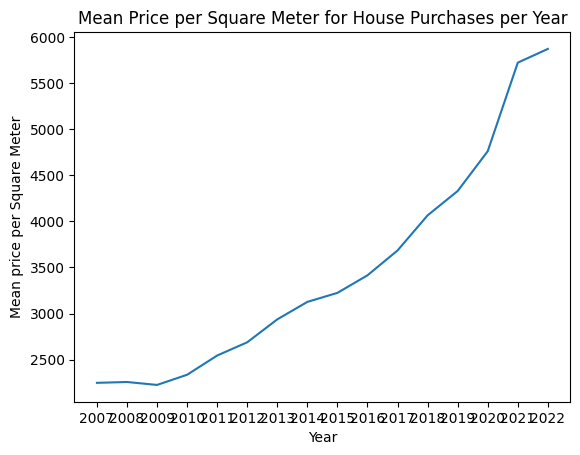

adat_year
2007    2289
2008    2065
2009    2079
2010    2022
2011    1935
2012    1881
2013    1968
2014    2017
2015    2092
2016    1899
2017    2054
2018    1893
2019    1900
2020    1902
2021    1986
2022    1945
Name: price_sqm, dtype: int64


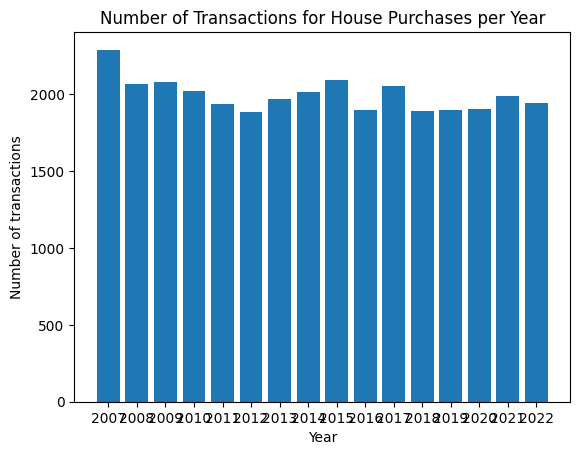

In [5]:
average_price_sqm_per_year = hamburg_df.groupby('adat_year')['price_sqm'].mean()
plt.plot(average_price_sqm_per_year.index, average_price_sqm_per_year.values)
plt.xlabel("Year")
plt.ylabel('Mean price per Square Meter')
plt.title('Mean Price per Square Meter for House Purchases per Year')
plt.show()

number_of_transactions_per_year = hamburg_df.groupby('adat_year')['price_sqm'].count()
print(number_of_transactions_per_year)
plt.bar(number_of_transactions_per_year.index, number_of_transactions_per_year.values)
plt.xlabel("Year")
plt.ylabel('Number of transactions')
plt.title('Number of Transactions for House Purchases per Year')
plt.show()

Overview of Data points not from the big cities

In [10]:
big_cities = ['Hamburg', 'Hannover', 'Bremen', 'Düsseldorf', 'Essen', 'Duisburg', 'Köln', 'Dortmund', 'Frankfurt', 'Stuttgart', 'München', 'Nürnberg', 'Berlin', 'Dresden', 'Leizig']
filtered_df = merged_df[merged_df['ort'].isin(big_cities)]

count_by_ort = merged_df.groupby('ort')['obid'].count().sort_values(ascending=False)
print(count_by_ort)

ort
Berlin          79313
Hamburg         31927
Bremen          31747
Köln            31468
Duisburg        31263
                ...  
Ketzin/Havel        1
Kayhude             1
Karlsfeld           1
Kall                1
Zossen              1
Name: obid, Length: 531, dtype: int64


### Dataset WK_cities

In [19]:
wk_cities = pd.read_csv('./Data/WK_cities.csv', dtype={'plz': object})

df_cities = pd.DataFrame(wk_cities)

/var/folders/5h/0pnj053913z2cl2pgkgr888h0000gp/T/ipykernel_55747/4038894759.py:1: DtypeWarning: Columns (11,21) have mixed types. Specify dtype option on import or set low_memory=False.
  wk_cities = pd.read_csv('./Data/WK_cities.csv', dtype={'plz': object})


In [20]:
plz_city = pd.read_csv('./Data/zuordnung_plz_ort.csv', dtype={'plz': object})
df_plz_city = pd.DataFrame(plz_city)

merged_df = pd.merge(df_cities, df_plz_city, how="left", on="plz")

hamburg_cities_df = merged_df[merged_df['ort'] == 'Hamburg']
hamburg_cities_df['adat_year'] = hamburg_cities_df['adat'].astype(str).str[:4]

/var/folders/5h/0pnj053913z2cl2pgkgr888h0000gp/T/ipykernel_55747/302521050.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hamburg_cities_df['adat_year'] = hamburg_cities_df['adat'].astype(str).str[:4]


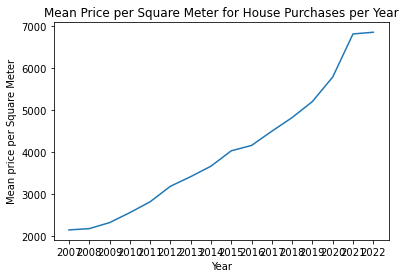

adat_year
2007    4652
2008    3903
2009    4018
2010    3921
2011    3921
2012    4030
2013    4036
2014    4018
2015    4177
2016    3836
2017    4018
2018    4033
2019    3786
2020    3908
2021    3946
2022    3697
Name: price_sqm, dtype: int64


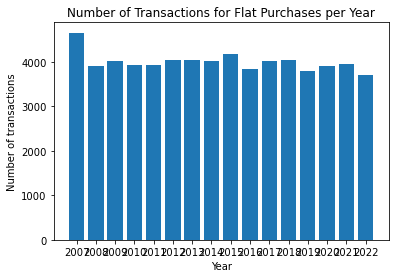

In [21]:
average_price_sqm_per_year = hamburg_cities_df.groupby('adat_year')['price_sqm'].mean()
plt.plot(average_price_sqm_per_year.index, average_price_sqm_per_year.values)
plt.xlabel("Year")
plt.ylabel('Mean price per Square Meter')
plt.title('Mean Price per Square Meter for House Purchases per Year')
plt.show()

number_of_transactions_per_year = hamburg_cities_df.groupby('adat_year')['price_sqm'].count()
print(number_of_transactions_per_year)
plt.bar(number_of_transactions_per_year.index, number_of_transactions_per_year.values)
plt.xlabel("Year")
plt.ylabel('Number of transactions')
plt.title('Number of Transactions for Flat Purchases per Year')
plt.show()